# Final project Scientific Programming with Python
#### By itamar yarden  - 204289987

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install pydotplus
# !conda install -y python-graphviz

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn as skl
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
from sklearn.inspection import permutation_importance


## Installation and import in order to use this program


## Task 1 - Intro

In this section I will review the data, explain and analyse the different usages of its features.



#### Overview  

The dataset for this project is about different types of energy, their costs due to different usages and different environments. In order to collect the data we can see that the researchers had done it over a long period of time (10 years), testing all kinds of parameters (14). 





 
 

#### Features

Now I will explore the features, thier types, and values. for this I will seperate them into categorical and numerical featues.

- Measure: it is used as an index, each measure specifies a specific observation of some building in a specific district at a specific time(year and month), therefore each measure has a uinique value. It is noted with  integer.

#### Categorical features:

- Month: The month the observation was made at, this value is ordinal because we can arrange month in an inner order from 1 to 12.

- Sector: This parameter denotes the sector the observation belongs to. It is a nominal feature, every value has its own name without inner order to them. 
values are:  factory/commercial/education/office/residential.

- District: A parameter to denote the district the observation was taken at. It is a nominal feature, there is no inner order to the district and we can call them by name.
Values are: 1 to 8.   

#### Numerical features:

- Year:  The year that the observation was made at, this feature is continious because there is not finite value to years. 

- Size: The square size of a floor, it does not denotes the total size of a building only the square size of floor, it is a continious value because we can always measure a bigger floor size.

- Elevation: The ground elevation at the building's location, it is a continious data type for the infinte range of its values.

- Floors: This feature denotes the amount of floors in a observation building, because it represent the amount it is a numerical feature with a discrete value.

- Built: A feature to denote the year the building was built, since its value is in years it is a continious feature like 'year' feature.

- Tmp_min (minimum tempature): A feature to specify the minum tempature measure that was taken at this observation location, tempature can measured on a scale therefore it is a a continious feature type.

- Tmp_max (maximum tempature): A feature to specify the maximum tempature measure that was taken at this observation location, tempature can measured on a scale therefore it is a a continious feature type.

- Tmp_mean (mean tempature): A feature to specify the mean tempature measure that was taken at this observation location, its value will be between the min and max value, tempature can measured on a scale therefore it is a a continious feature type.

- Cost: A feature to denote the cost of the observation (heating cost of a specific building on a month on some year), because we can measure different costs on a scale the feature is of type numerical continious.

#### Target feature

- Source: This feature is the target of the data set, by using this feature we can learn how to classify any new observation. It's of type categorical nominal feature. 
Values: gas, oil, electricity. 

### Overview on the data

In order to review some meta data on the dataset that was given to me I will read the data using python pandas dataframe and present some minor analyses.

In [2]:
#
# Helper functions
#

def paintHistogram(df, x_label, y_label, b = 0):
    '''
    Paint a plot histogram to present feature spread 
    '''

    plt.figure(figsize= [10,10])
    energy_df[x_label].hist(bins = b)
    plt.xlabel(x_label, size = 20)
    plt.ylabel(y_label, size = 20)
    plt.show()

def paintHeatmap(df):
    '''
    Paint an heat map  to present features correlation 
    ''' 
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(21, 17))
    cmap = sns.diverging_palette(200, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap = cmap, center=0, annot = True , square = True , linewidths = .6, vmin = -1, vmax = 1 )
    plt.show()

def paintPlot(df,y_feat, x_feat  ):
    '''
    Paint plot graph to present the data 
    '''
    df = pd.DataFrame(df.groupby(x_feat).agg('mean'))
    plt.figure(figsize= (12,12))
    plt.plot(df[y_feat])
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title('{} and {} plot'.format(x_feat, y_feat))

def categoricalTransformation(df, param):
    '''
    Transform categorical feature into numbers 
    '''
    group_list = []
    uniqueSectorValues = df[param].unique()
    for val in uniqueSectorValues:
        group_list.append(val)

    df[param] = pd.Categorical(df[param], ordered=True, categories=group_list).codes + 1
    return df

def analyseFeatureCorrelation(df, feature,  target):
    '''
    Anaylse feature filling correaltion with target
    based on different methods: mean, median for numerical values.
    '''
    print('{} median value: '.format(feature) , df[feature].median())
    print('{} mean value: '.format(feature) ,df[feature].mean())

    #creating temporary list the floor size feature filled in with missing values by mean function
    tmp_mean = df[feature].fillna(df[feature].mean())

    #creating temporary list the floor size feature filled in with missing values by median function
    tmp_median = df[feature].fillna(df[feature].median())


    #creating a numeric feature transformation of the target feature
    df = categoricalTransformation(df,'source')
    

    print("Correlation between target value-sorce and floor size(mean) : ", df[target].corr(tmp_mean))

    print("Correlation between target value-sorce and floor size(median): ", df[target].corr(tmp_median))

    print("Correlation between target value-sorce and floor size(origial with missing values): ", df [target].corr(df.floor_size))


In [3]:
energy_df = pd.read_csv('energy_source3.csv')

In [4]:
#changing the feature size name to floor_size to avoid collisions with the function size of data frame
energy_df.rename(columns={'size': 'floor_size'}, inplace=True)

#Count of all observation
print('Total number of observations: ' , len(energy_df.index),'\n')

#Count of every feature and number of total values
print('Number of values for each feature in the dataset:')
print(energy_df.count(),'\n')


#The different types of the dataframes
print('Feature types represntation:')
print(energy_df.dtypes)

Total number of observations:  36000 

Number of values for each feature in the dataset:
measure       36000
year          36000
month         36000
sector        34595
floor_size    35458
district      36000
elevation     36000
floors        36000
built         36000
tmp_min       36000
tmp_mean      34575
tmp_max       34649
cost          35384
source        36000
dtype: int64 

Feature types represntation:
measure         int64
year            int64
month         float64
sector         object
floor_size    float64
district        int64
elevation     float64
floors          int64
built           int64
tmp_min       float64
tmp_mean      float64
tmp_max       float64
cost          float64
source         object
dtype: object


### Intro summarize

After revewing the meta data of the Energy data set we can see that there is some data scrubing needs to be done.
we can see that we have 3 categorical features. the 'sector' feature will need to have encoding from string value to integer. 

Dealing with missing values -  one of the main issues dealing with raw data is that it contains missing values,
there are several types of missing values and many different approachs of dealing with it. 
Reviewing the data before start handling with it gives us a better prespective of it and can help us decide what to do with those values.
We can see that there are some features with missing values, for each feature we will have to decide weather it is best to drop that entire observation or filling in the missing values with the mean/median value of the feature (if it is a numerical feature) or with mode value of the feature (if it a categorical feature).

Other type of missing values is one where the data is filled with wrong values. 
from reviewing the data we can see that:
-  month: has a value of 22 in some rows, that is not right because we have 12 months in a year.


In the next chapter I will review other features that are candidte of having 'garbage' values.
- for size (floor size) the values range is between 129 and 5947 which sounds like to much and needs to be examined.
- for the tempature minimum, maximum and mean I will check if for any observation the mean is between min and max, and also that the min and max do not exceed each other.


## Task 2 - Initial Data Analysis

In this section I will handle the data and preform data scrubing, handling missing and incorrect values.
In the previous section i've mentioned the features that are having missing/incorrect data.
Inorder to get the best result I will review each feature and  decide how to cope with it. 

### Month 


In [5]:
# Examining how many values are incorrect
agg = energy_df.groupby(['year','month']).agg('count')

#reviewing every (year,moth) index in the groupby table
years = [2014,2013,2010,2008,2006,2005]
months =  [1,2,3,4,5,6,7,8,9,10,11,12,22]
dict_tup = {}
for year in years:
    tmp_list = []
    for month in months:
        tmp_list.append(tuple([year,month]))
    dict_tup[year] = tmp_list
    print(agg[agg.index.isin(tmp_list)].measure)


year  month
2014  1.0      300
      2.0      300
      3.0      300
      4.0      300
      5.0      300
      6.0      299
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     299
      22.0       2
Name: measure, dtype: int64
year  month
2013  1.0      300
      2.0      299
      3.0      299
      4.0      300
      5.0      300
      6.0      300
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     300
      22.0       2
Name: measure, dtype: int64
year  month
2010  1.0      299
      2.0      300
      3.0      300
      4.0      299
      5.0      300
      6.0      300
      7.0      300
      8.0      300
      9.0      300
      10.0     300
      11.0     300
      12.0     300
      22.0       2
Name: measure, dtype: int64
year  month
2008  1.0      300
      2.0      300
      3.0      300
      4.0      300
      5.0      300
      6.0      300
      7.0    

Now I can see that there are 11 wrong values.
Inorder to correct them into to thier right value.
In a year that has the month '22' appeared in it and a another with same number of missing value I will transform 22 into this number.
For all the years that has the month '22' and it is split between different month, I will complete this by comapring the mean_tmp.

In [6]:

#For every month in a certain year that has the same missing value as appeared in 'month-22' value, replace it with this month value (i.e if a month 22 in year 2005 has 2 value and month 1 in year 2005 has 2 missing value replace 22 with 1)

#for 2005
replace_month = energy_df[energy_df.year.eq(2005) & energy_df.month.eq(22)]
energy_df[energy_df.year.eq(2005) & energy_df.month.eq(22)] = replace_month.replace(22,1)

#for 2008 

replace_month =  energy_df[energy_df.year.eq(2008) & energy_df.month.eq(22)]
energy_df[energy_df.year.eq(2008) & energy_df.month.eq(22)] = replace_month.replace(22,12)

#For every month in a certain year that does not have the same missing value as appeared in 'month-22' value, I will replace after comparing to this month in another year observation (based on year, district and mean_tmp)

#2006
replace_month =  energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(1)]
energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(1)] = replace_month.replace(22,6)
replace_month =  energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(5)]
energy_df[energy_df.year.eq(2006) & energy_df.month.eq(22) & energy_df.district.eq(5)] = replace_month.replace(22,5)

#2010
replace_month =  energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(8)]
energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(8)] = replace_month.replace(22,1)
replace_month =  energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(6)]
energy_df[energy_df.year.eq(2010) & energy_df.month.eq(22) & energy_df.district.eq(6)] = replace_month.replace(22,4)

#2013
replace_month =  energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(2)]
energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(2)] = replace_month.replace(22,2)
replace_month =  energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(5)]
energy_df[energy_df.year.eq(2013) & energy_df.month.eq(22) & energy_df.district.eq(5)] = replace_month.replace(22,3)

#2014
replace_month =  energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(12)]
energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(12)] = replace_month.replace(22,6)
replace_month =  energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(337)]
energy_df[energy_df.year.eq(2014) & energy_df.month.eq(22) & energy_df.elevation.eq(337)] = replace_month.replace(22,12)

### Sector

This feature is categorical feature, its values are factory,commercial,education,office,residential.

As presented above this feature has 1405 missing values (np.nan).


I will review the distribution of its unique values, And will decide how to handle those 1405 missing values.


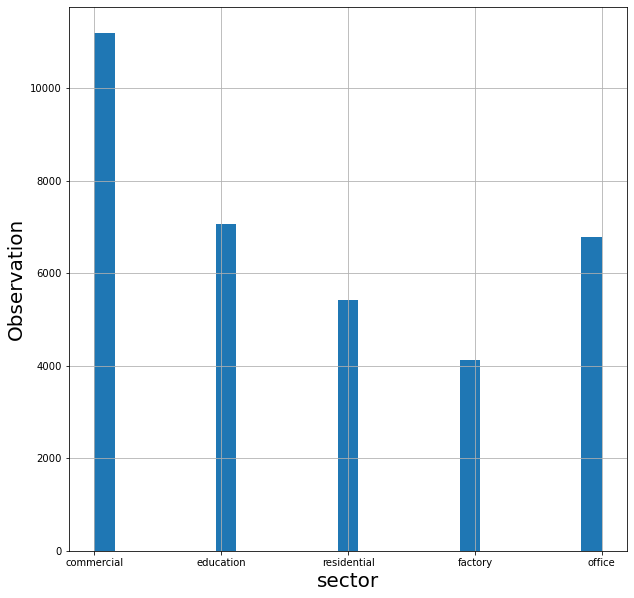

In [7]:
#creating an histogram for this feature to present the distribution of its values.
paintHistogram(energy_df, 'sector', 'Observation',25)

We can see now that most of its values are commerical.

There are several ways to handle categorical missing data, 


because the number of observation having 'sector' missing as data is not too high I will use the mode function to fill those values.

In [8]:
#Filling missing values with mode function
energy_df.sector = energy_df.sector.fillna(energy_df.sector.mode()[0])


### Size (floor size)

This feature is numerical and describing the floor size of a building.

It has 542 missing values, which is a low amount compared the entire data (36K values).

I will again review its value distrbuation and decide how to handle these missing values.

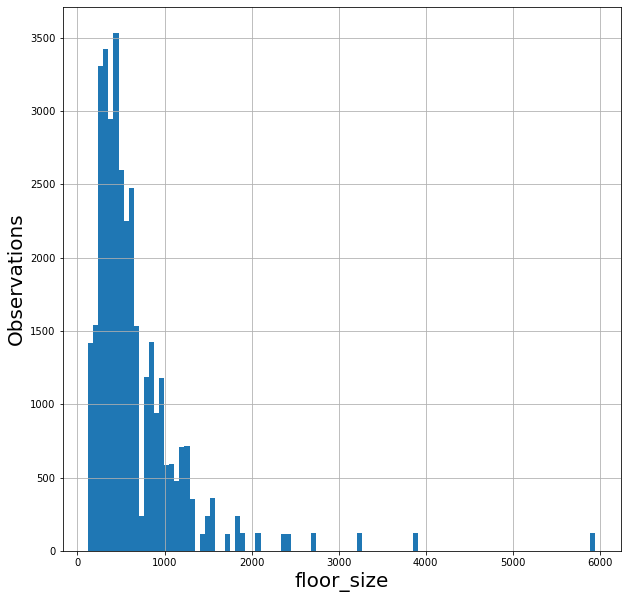

In [9]:
#Creating an histogram of floor size feature
paintHistogram(energy_df,'floor_size', 'Observations', 100)

Most of the values distrbuation is at lower bound of the values.


I will use either mean, or median in order to fill the missing data.

for that I will review both options and how they will correlate to the target value.

In [10]:
#Anaylse which method is better for filling the missing values for floor size feature
analyseFeatureCorrelation(energy_df, 'floor_size', 'source')

floor_size median value:  497.0
floor_size mean value:  656.6619098651926
Correlation between target value-sorce and floor size(mean) :  -0.021934150232355464
Correlation between target value-sorce and floor size(median):  -0.021830345079703058
Correlation between target value-sorce and floor size(origial with missing values):  -0.02210366752578709


Now we can see that either way it doesn't metter at all, becasue the missing values are so few compared to the data size and 
so I will choose to fill the missing values with mean.

In [11]:
energy_df.floor_size = energy_df.floor_size.fillna(energy_df.floor_size.mean())

### Cost 


This feature is numerical and describing the floor size of a building.

It has 542 missing values, which is a low amount compared the entire data (36K values).

I will again review its value distrbuation and decide how to handle these missing values.

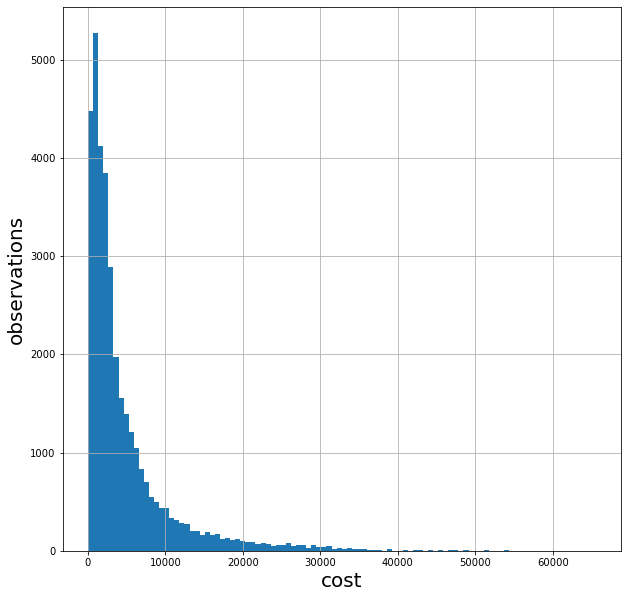

In [12]:
#Creating and plot historgram of the cost feature
paintHistogram(energy_df, 'cost', 'observations', b = 100)

In [13]:
#Anaylse which method is better for filling the missing values for cost feature
analyseFeatureCorrelation(energy_df, 'cost', 'source')

cost median value:  2624.9849999999997
cost mean value:  4851.541864684571
Correlation between target value-sorce and floor size(mean) :  -0.08411895878653619
Correlation between target value-sorce and floor size(median):  -0.08373493552937802
Correlation between target value-sorce and floor size(origial with missing values):  -0.021934150232355464


In [14]:
#Filling the cost missing values with the mean value
energy_df.cost = energy_df.cost.fillna(energy_df.cost.mean())

### The tempature feature (min, mean, max)
These features will require a deeper observation of thier content and the relation between one to another.
Becasue the mean_tmp relays on max and min tempature, first I will look for observation with missing mean and max.


In [15]:
#presenting the observation with missing with two features or more (from the min/mean/max tempature features).
print('Number of missing values for both tmp_mean and tmp_max: ',len(energy_df[energy_df.tmp_max.isna() & energy_df.tmp_mean.isna()]))

#Because this is a small number of observations we will delete all these rows
energy_df = energy_df[energy_df.tmp_max.notna() | energy_df.tmp_mean.notna()]

Number of missing values for both tmp_mean and tmp_max:  55


Now I will complete the missing for mean and max tempature with the mean value of their feature,


In [16]:
#Completing the missing values for mean feature
energy_df.tmp_mean = energy_df.tmp_mean.fillna(energy_df.tmp_mean.mean())

#Completing the missing value for the max feature
energy_df.tmp_max = energy_df.tmp_max.fillna(energy_df.tmp_max.mean())


Now the data is ready for the next chapters of exploration and classification.<br>

A summary of the changes that have been made on the intial dataset:<br>

1) Month - there was 11 values in the month feature noted 22 (outliers), I fixed it manualy with a deducative data cleaning.<br>
   by using the other features (year, sector) I was able to analyse the outliers values and replace them with correct ones.

2) Sector - It is a categorical feature, after reviewing the distirbuation of its value and because the amount of missing values was about 5% I decided to fill them with the mode function.

3) Size - It is a numerical feature, It had less then 2% of the data missing values.Therefore after reviewing it's distirbuation I decided to fill the missing values with mean function.

4) Cost - It is a numerical feature, It had less then 2% of the data missing values.Therefore after reviewing it's distirbuation I decided to fill the missing values with mean function.

5) Tempature features - I filled the missing values of the mean and max tempature with mean function for their feature.


In [17]:
#include the data set after all the data cleaning
energy_df.to_csv('Energy_source_cleaned.csv')


## Task 3 - Exploratory Data Analysis
In this section I will present some insights on the data using different kinds of plots,<br> 
to begin with I will transform all the categorical values so they will be included in all the presentations.<br>
I will add a feature that is the total floor size of a building.


In [18]:
#Dropping the measure feature which is index
energy_df.drop(['measure'], axis = 1, inplace= True)

#converting the sector feature to numeric like

energy_df = categoricalTransformation(energy_df, 'source')
energy_df = categoricalTransformation(energy_df, 'sector')

#Adding the total size of a building
energy_df['total_size'] = energy_df['floors']*energy_df['floor_size']

 

### Features and their relations
Now after converting the entire data to numeric values I can review the heatplot map of the data,
and also we will review the correlation in a table.

All the data features distribution

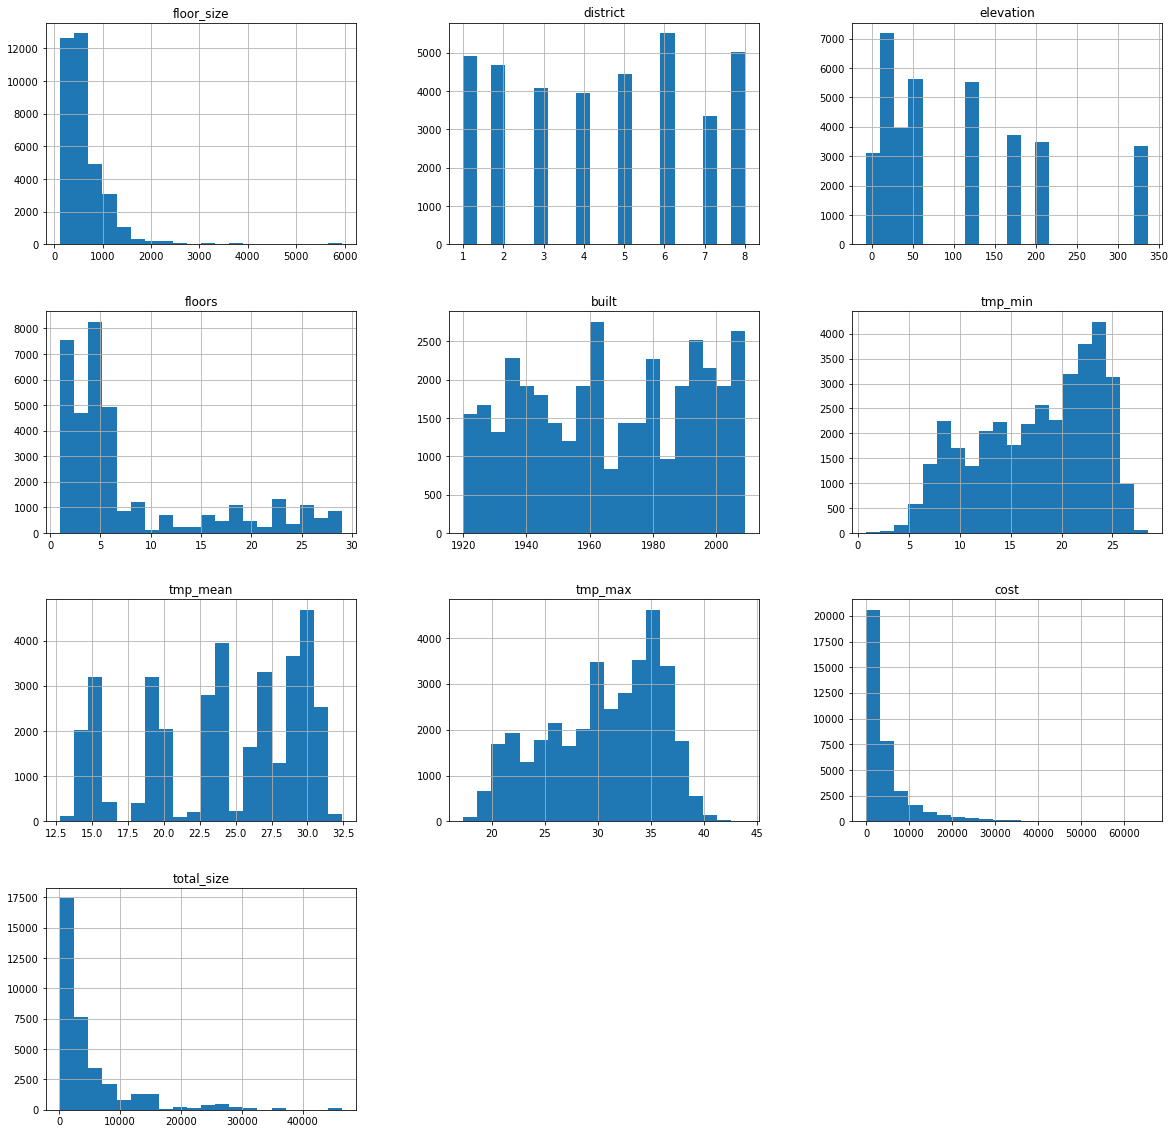

In [19]:
#Exploring all data features distribution
tmp_df = energy_df.drop(['year', 'month', 'sector','source'], axis = 1) 
hist = tmp_df.hist(bins=20, figsize=(20,20))

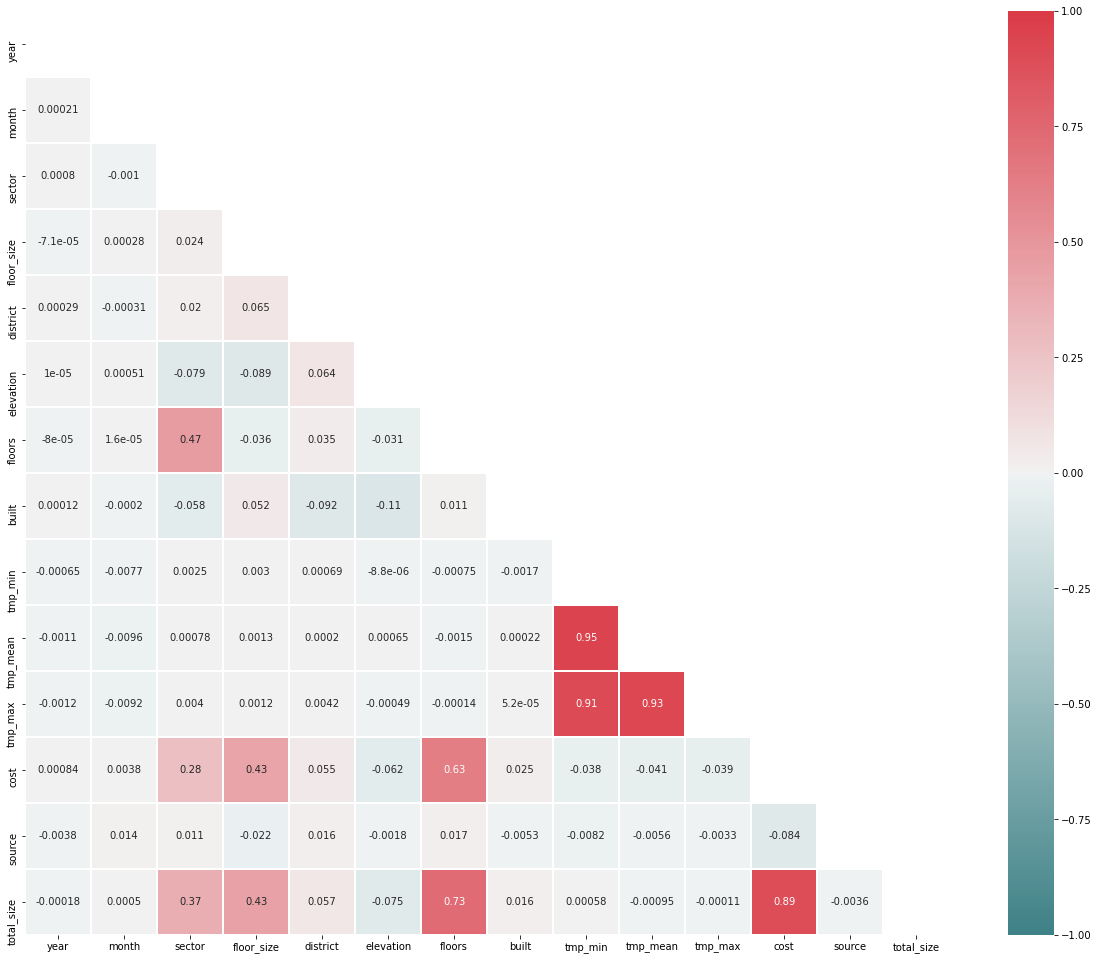

In [20]:
#creating a heatmap correlation of the data frame, giving it size, color palette, desciribing in grid
paintHeatmap(energy_df)

From this heatmap we can see that max and min tempatures feature is highly correlated with the mean feature, therefore I will clean its values from the data set.

I also saw that total_size and cost are highly corelated so I decided to create a new feature that will present the ratio between the total size of a building and the cost of it.

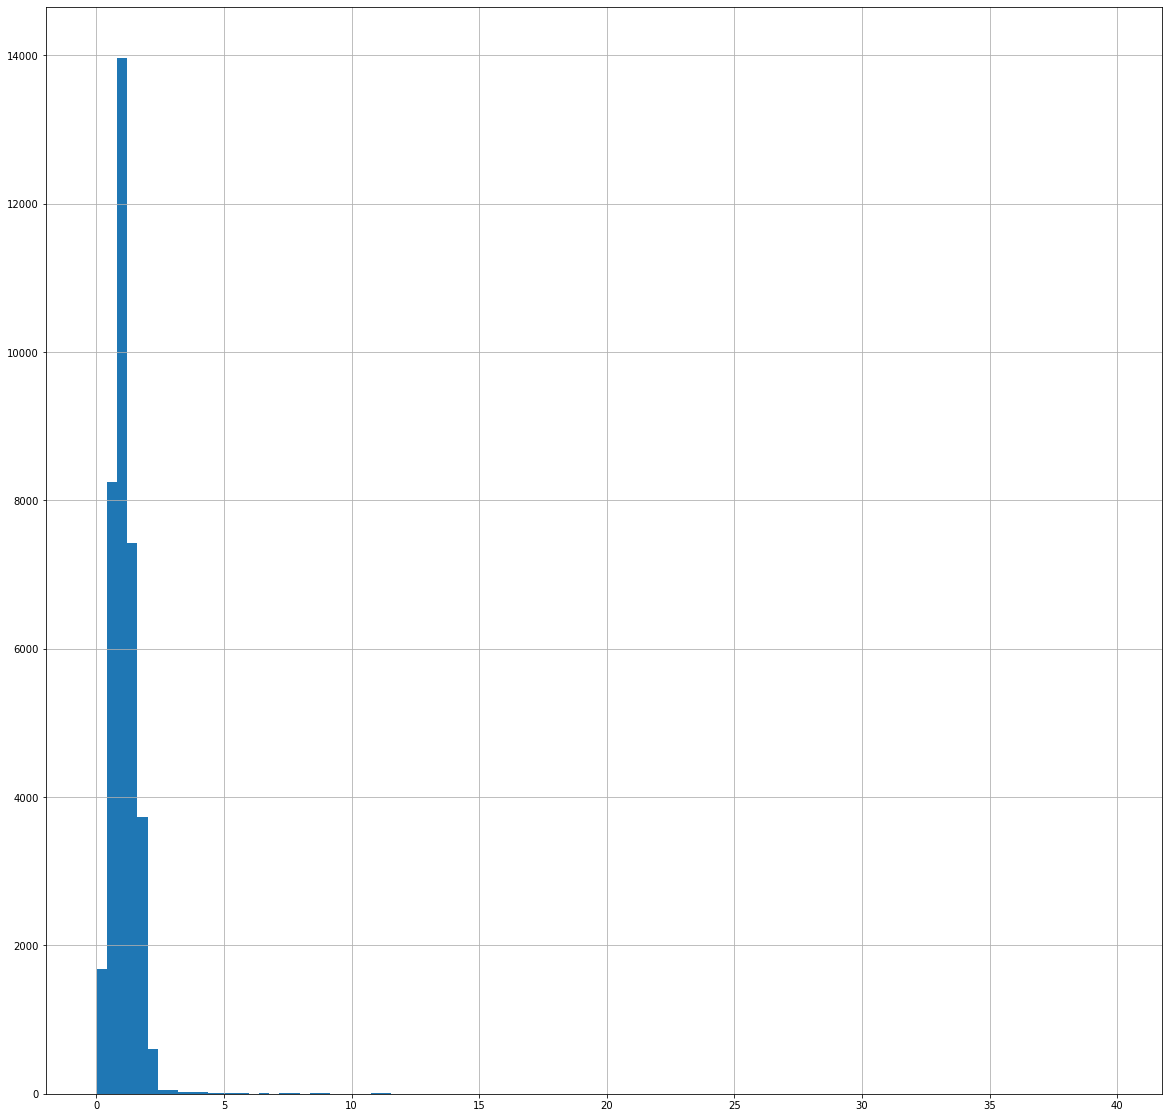

In [21]:
#Dropping the tmp_max and tmp_min columns
energy_df.drop(['tmp_max','tmp_min'], axis = 1, inplace= True)

#Addind the cost_per_meter feature 
energy_df['cost_per_meter'] = energy_df['cost']/energy_df['total_size']

hist = energy_df['cost_per_meter'].hist(bins=100, figsize=(20,20))

There are really few values that are over 20 therefore I will delete them inorder not to harm the data distrbuation.

In [22]:
#Deleting excessive value from the cost_per_meter values
energy_df = energy_df.drop(energy_df[energy_df.cost_per_meter > 20].index)

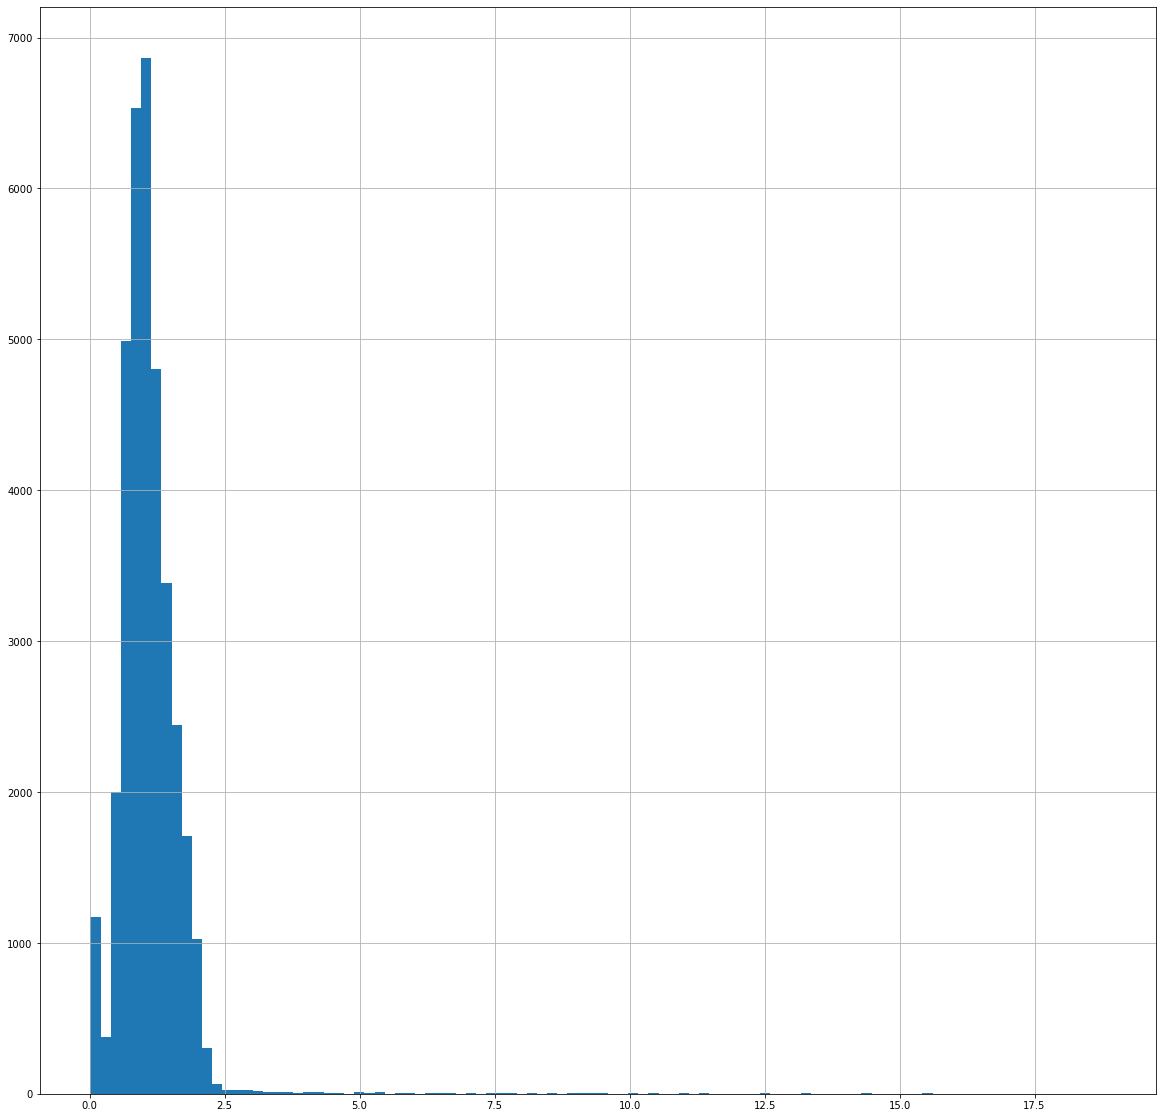

In [23]:
hist = energy_df['cost_per_meter'].hist(bins=100, figsize=(20,20))

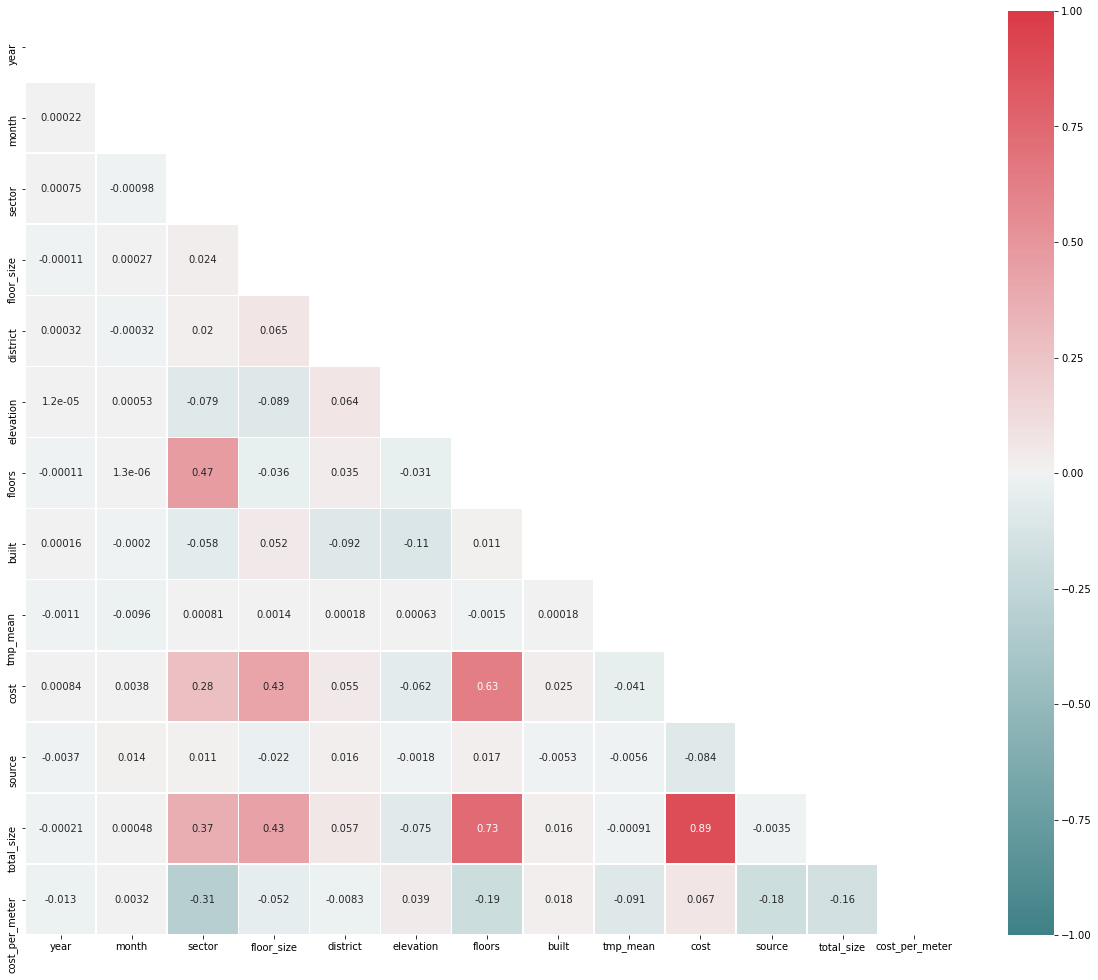

In [24]:
paintHeatmap(energy_df)

Now that we have the correlated heatmap we can see the all the features are not strongly correlated to the target class - source.<br>

Weak correlation between features:
There are some features that have a weak correlation such as:<br>
- Built (the year a facilty was built in) and tmp_mean, it is very clear why tempature in a month and year will not be affect/related to the year a building was built in.
The tempature is affected by season and weather around the time of a month. (same goes to floors which is the number of floors in a building).
 
- Month/ Year and floors/floor_size have also a weak correlation, we can understand why dates won't affect the number of floors (or the land) that a facilty has.




I will examine the floor feature with the cost and the sector, I will use pair plotting to review it.


 

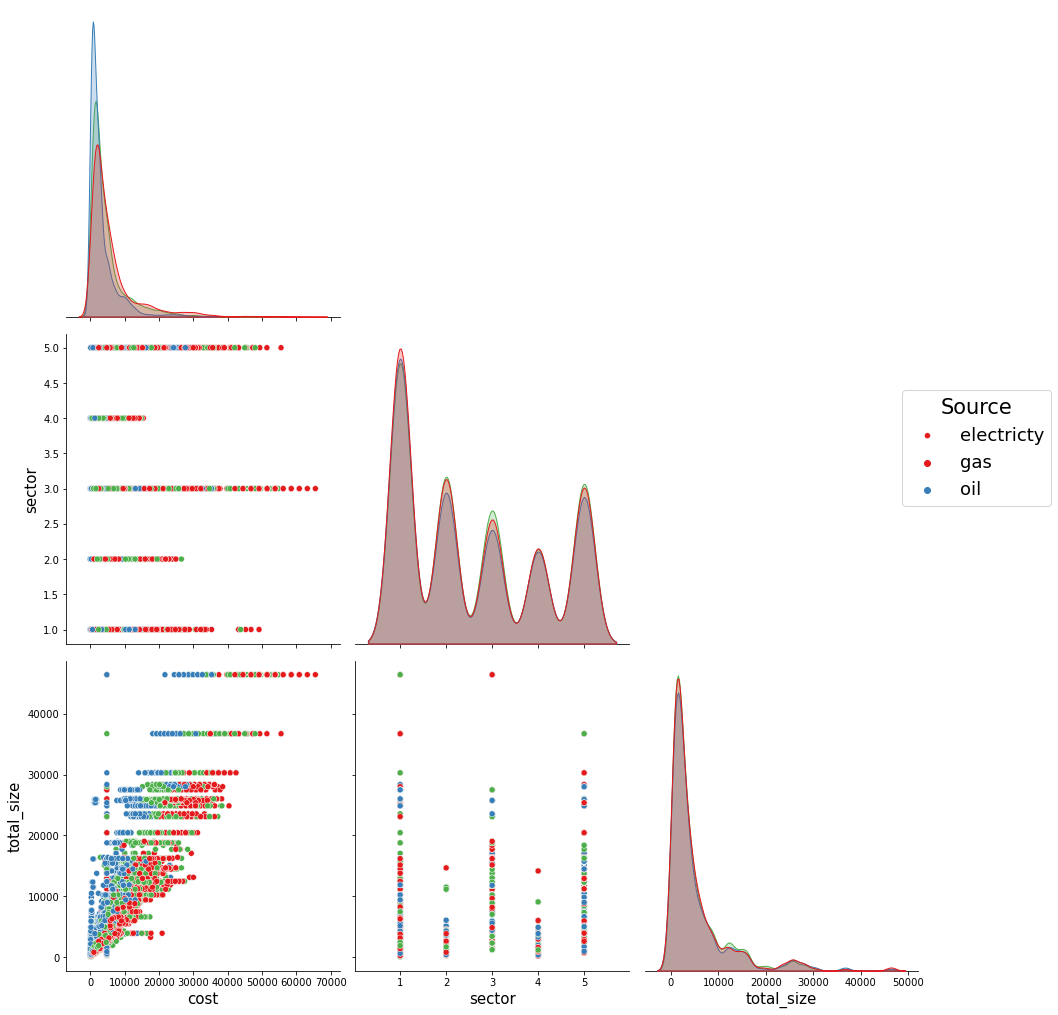

In [25]:
#Pair plotting of this three features.
energyPairplot = energy_df[['cost','sector','total_size','source']]
sns.set_context(rc={"axes.labelsize":15})
pairPlot = sns.pairplot(energyPairplot, hue='source', palette='Set1', corner=True)
pairPlot.fig.set_size_inches(15,15 )
pairPlot._legend.remove()
plt.legend(title='Source', loc=(2., 1.5), labels=['electricty', 'gas', 'oil'], prop={'size': 18}, title_fontsize='21')
plt.show()

We can see from the pair plot that there is no certain behavior of the energy source based on some feature combination,
this could mean that in different sectors with different building sizes we use different types of energy sources, and therefore it will be hard to predict what the energy source will 
is most fitted to use for heating.

I will show the data and it's behavior aggregated by years and month.



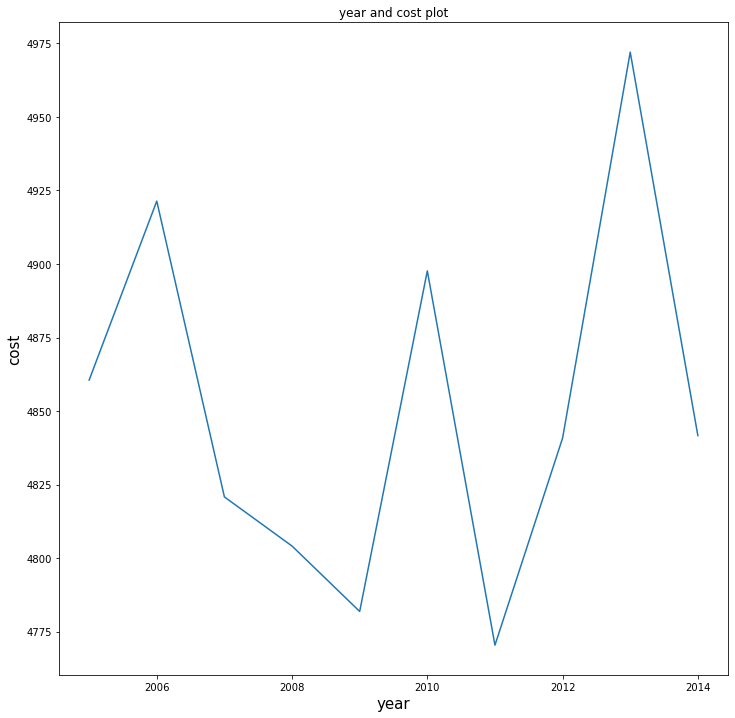

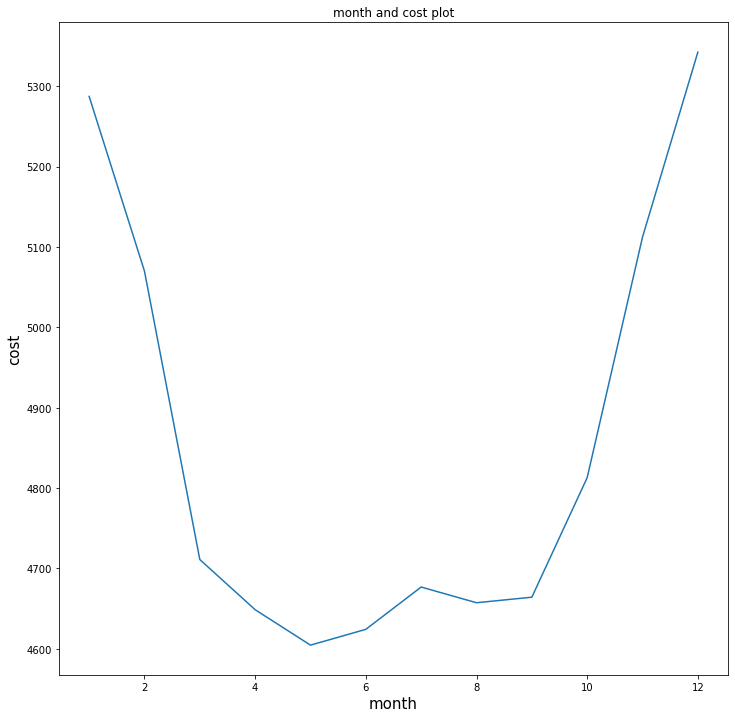

In [26]:
#creating aggregate dataframes based on year/ month
df_groupby_year = energy_df.groupby('year').agg('mean')
df_groupby_months = energy_df.groupby('month').agg('mean')
paintPlot(df_groupby_year,'cost', 'year')
paintPlot(df_groupby_months,'cost','month')


We can see that price between the years went up and down, 
but from the month aggergation we can see the around December and January is the highest, that is probaly due the winter where we need to warm the facities and heating cost more. 



The total size of a building and the cost of the heating - we can see from this plot that there is a linear relation between the total size of a building and the cost for heating that building, which makes sense.  

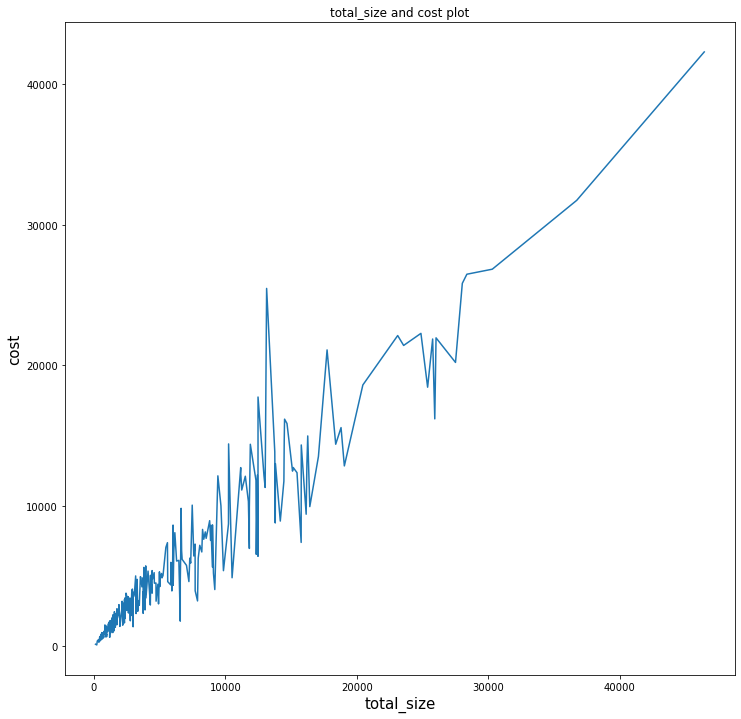

In [27]:
paintPlot(energy_df, 'cost','total_size')

## Section 4 - Classification Model

In this section I will try to build a good classifier, first I will splitting it to train and test sets.<br>
After splitting the data I will train the required models Gauss naive bayes and decision tree.

In [28]:
def createModel(x_data, y_data, model):
    '''
    A function to create a naive bayes model, 
    and score its prediction base on training and test set
    '''
    x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data,train_size= 0.8, random_state=1)

    #from sklearn.naive_bayes import GaussianNB
    prediction = model.fit(x_train,y_train)                  
    y_model = model.predict(x_test)

    print(metrics.accuracy_score(y_test, y_model))
    return y_model



def chooseBestFeatures(df,features, target, model):
    '''
    A function to create a choose the best two features, 
    Based on some classifier 
    '''
    best_features = []
    best_score = 0

    y_data = df[target]
    for i in range(len(features)):
        for j in range(len(features)):
            if(i != j):
                x_data = df[[features[i], features[j]]]
                x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, train_size= 0.8, random_state=1)
                prediction = model.fit(x_train, y_train)                  
                y_model = model.predict(x_test)

                if(best_score < metrics.accuracy_score(y_test, y_model)):
                    best_score = metrics.accuracy_score(y_test, y_model)
                    best_features = [features[i], features[j]]
                    best_prediction = prediction
                
    print('The best score of training is: {}'.format(best_score))
    print('It was achieved by: {}, {}'.format(best_features[0], best_features[1]))
    return best_prediction   

def paintData(df, features,target, clf, scatter = False):
    '''
    This function plotting the results of some model prediction,
    placing the values on the contour plot.
    '''
    
    
    feat1, feat2 = features
    y = df[target]
    X = df[[feat1, feat2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
    
    # Predict the response for test dataset

    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    metrics.classification_report(y_test, y_pred)

    hueorder = clf.classes_
    
    x_min, x_max = X_train.loc[:, feat1].min() -1, X_train.loc[:, feat1].max() +1
    y_min, y_max = X_train.loc[:, feat2].min() -1, X_train.loc[:, feat2].max() +1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)

    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Set1', alpha=0.5)
    plt.clim(0, len(clf.classes_)+3)
    fig = plt.gcf()
    fig.set_size_inches(18, 15)
   
    if not scatter:
        sns.scatterplot(data=df[::5], hue='source', hue_order=hueorder, palette='Set1', x=feat1, y=feat2)

    
    if scatter:
        #Adding overlay:
        x_data = df[[feat1, feat2]]
        y_pred = clf.predict(x_data)

        incorrect_vals = []
        temp_group = df.source
        temp_vals = df.values.tolist()
        index = energy_df.columns.get_loc('source')
        for i in range(len(df)):
            if(y_pred[i] != temp_vals[i][index]):
                incorrect_vals.append(temp_vals[i])

        incorrect_vals = pd.DataFrame(incorrect_vals, columns=df.columns)

        temp_group = clf.classes_

        sns.scatterplot(data=incorrect_vals[::5], hue='source', hue_order=temp_group, palette='Set1', x=feat1, y=feat2)
    plt.show()


#### Naive bayes classifier

In the first part I will train a naive bayes classifier based on the clean data, and see the result for this prediction,
and present it on a contour plot.

In [29]:
#Creating the GNB model with splitting the data
x_data = energy_df.drop(['source'], axis = 1)
y_data = energy_df['source']

model = GaussianNB()
y_pred = createModel(x_data, y_data, model)

0.5273334260676033


We can see that the model is trained based on all the feature it yields a pretty bad result for this predication.

In [30]:
#Creating the baseline classification data
df = pd.read_csv('energy_source3.csv')
df.dropna(inplace= True)

group_list = []
uniqueSourceValues = df.source.unique()
for val in uniqueSourceValues:
    group_list.append(val)
df["source"] = pd.Categorical(df.source, ordered=True, categories=group_list).codes + 1

group_list = []
uniqueSourceValues = df.sector.unique()
for val in uniqueSourceValues:
    group_list.append(val)
df["sector"] = pd.Categorical(df.sector, ordered=True, categories=group_list).codes + 1

x_data_baseline = df.drop('source', axis = 1)
y_data_baseline = df['source']

y_pred = createModel(x_data_baseline, y_data_baseline, model)

0.3883150419625565


When training the model based on the raw data it yield even worse result, It could mean that the GNB classifier his not best fit for this kind of data.

We will use our cleaned dataset inorder to create the best fit for training our GNB model.

In [31]:
tmp = energy_df.drop('source', axis = 1)
features = tmp.columns.values
target = 'source'
model = GaussianNB()
prediction = chooseBestFeatures(energy_df,features, target, model)

The best score of training is: 0.5462512171372931
It was achieved by: elevation, cost_per_meter


We can see now that based on this two features the prediction based on 'year' and 'cost_per_meter' yields the best predict score.
I will present the results on a contour plot.


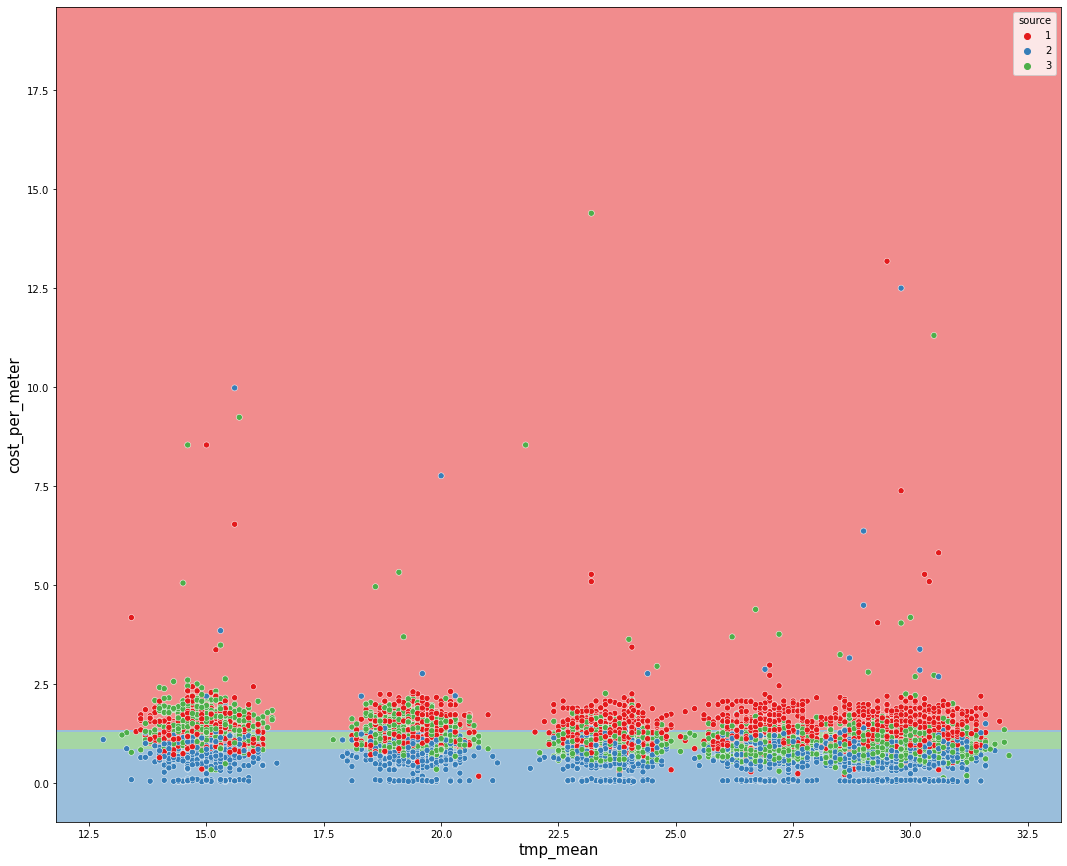

In [32]:
features = ('tmp_mean','cost_per_meter')
X = energy_df[['tmp_mean','cost_per_meter']]
y = energy_df[target]

paintData(energy_df, features, target, model)


The values of the target explanation:<br>
    - 1 = electric<br>
    - 2 = gas<br>
    - 3 = oil<br>

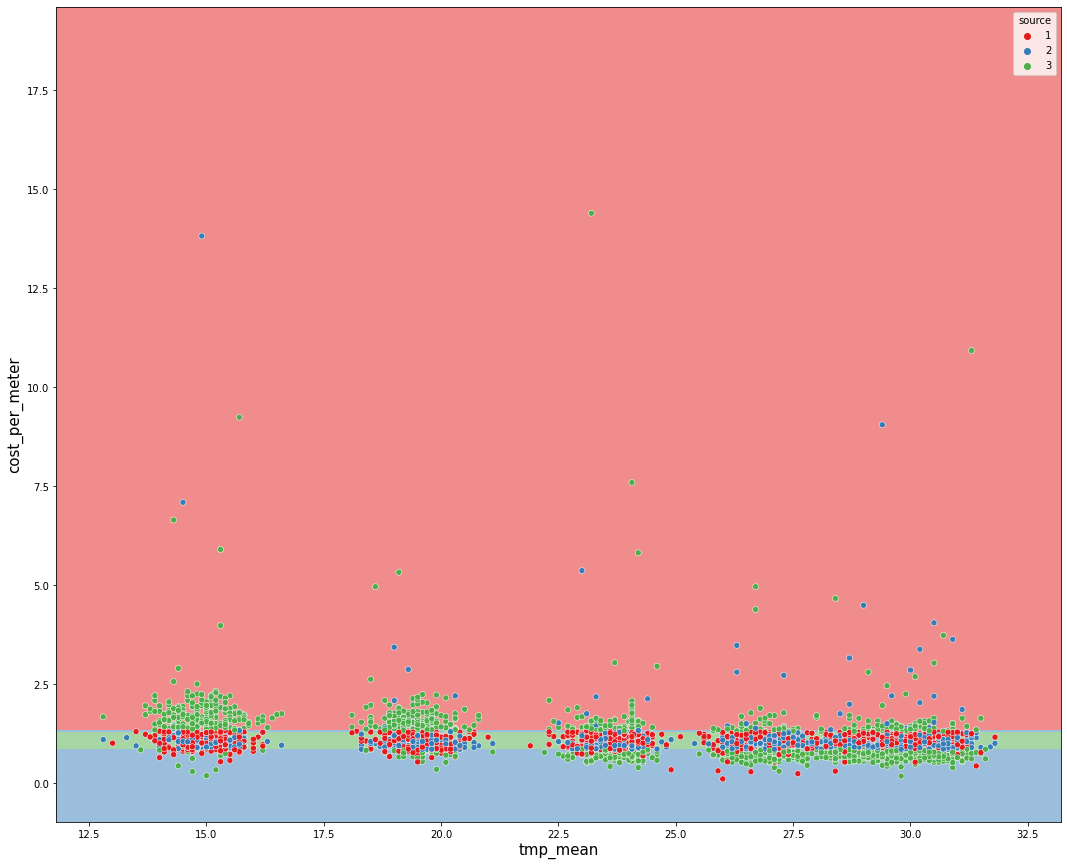

In [33]:
#Presenting only in the incorrect values

paintData(energy_df, features, target, model, True)


The GNB classifier is probaly not the best fitting model for my data, it gives many wrong prediction although I managed to improve its learning rate by almost doubling the predictions score.

### Decision tree classifier

For the second part of this section I will do the same thing with different classifier,<br>
this time I will use the DesicionTreeClassifier from sklearn, at first I will train it on baseline,<br>
then I will try to see if I can get better results with my cleaned data, I will again select the most relevent features.

I will reuse the training and test data from the previous part of this section. (where I compared my result to the baseline result)


In [34]:
#Creating a model based on decision tree classifier
model = DecisionTreeClassifier()

#learning the baseline data
y_pred = createModel(x_data_baseline, y_data_baseline,model)

0.7520981278244029


It is great! we see already that the results are way better than the Naive Bayes classifier model.


In [35]:
#Creating a model again but this time with the cleaned data

#Choosing the best three
x_data = x_data[['cost_per_meter', 'sector', 'tmp_mean']]

y_pred = createModel(x_data, y_data, model)

0.9145917373765475


Amazing! the data improved the learning with the three most relevant parameters!

Feature: cost_per_meter, Score: 0.6490164983446011
Feature: sector, Score: 0.29077428150126583
Feature: tmp_mean, Score: 0.12350109896224575


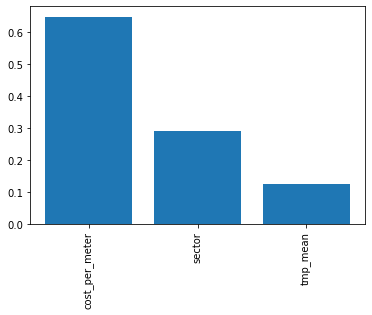

InvocationException: GraphViz's executables not found

In [36]:
# Creating the tree visualisation and report
result = permutation_importance(model, x_data, y_data, n_repeats=10, random_state=0)
importance = zip(x_data.columns, result['importances_mean'])

# summarize feature importance
for i,v in importance:
    print("Feature: {}, Score: {}".format(i,v))

# plot feature importance
plt.bar(range(len(x_data.columns)), result['importances_mean'])
plt.xticks(ticks=range(len(x_data.columns)), labels=x_data.columns, rotation=90)
plt.show()

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True,rounded=True,feature_names=x_data.columns, class_names=['oil', 'gas','elec'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('manipulatedDecisionTree.png')
Image(graph.create_png())

Now we see that the cleaned data has improved the learning for this classifier, let's review its results on a contour plot.

## Section 5 - Summary

In this section I will make a short review of this project with some insight and explnation of the data, the results and my experience from this project.


### Data 
The data was messy at start, but it wasn't too hard to see what needed to be done in order to clean it. The main issue I had with the data is realising what I have to do inorder to clean it. I had to take decision where to drop observations and where I can cope and handle missing/ outlier values. after preforming some testing on the data it was easier making these choices.

### Difficulties
 - Choosing what to do with the raw data, how to clean it, and how to manipulate it in order to get the best observation and not harming the observations that where made.

 - When I saw the result of GNB I thought that there was a mistake with the my cleaning and I had to check myself all over again.
 after training the GNB classifier with the baseline data I realised that this classifier is probaly not best fit for this kind of features.

- Choosing on dropping feature (tmp_max) and adding new features (total_size, cost_per_meter) was also a hard choice to make inorder not to harm the data and the classifiers.

### results
After seeing the results of the decision tree classifier compared between the baseline and the clean data , I realised that the data cleaning was neccecry inorder to best training the model. The improvement between the training result is substantial.  

